# Peter và Sói: Giới thiệu về Học tăng cường

Trong hướng dẫn này, chúng ta sẽ học cách áp dụng học tăng cường vào một bài toán tìm đường. Bối cảnh được lấy cảm hứng từ câu chuyện cổ tích âm nhạc [Peter và Sói](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) của nhà soạn nhạc người Nga [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Đây là câu chuyện về cậu bé tiên phong Peter, người dũng cảm rời khỏi nhà để đến một bãi trống trong rừng nhằm đuổi theo một con sói. Chúng ta sẽ huấn luyện các thuật toán học máy để giúp Peter khám phá khu vực xung quanh và xây dựng một bản đồ điều hướng tối ưu.

Đầu tiên, hãy nhập một số thư viện hữu ích:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Tổng quan về Học Tăng cường

**Học Tăng cường** (Reinforcement Learning - RL) là một kỹ thuật học cho phép chúng ta tìm hiểu hành vi tối ưu của một **tác nhân** trong một **môi trường** nào đó bằng cách thực hiện nhiều thí nghiệm. Một tác nhân trong môi trường này cần có một **mục tiêu**, được xác định bởi một **hàm phần thưởng**.

## Môi trường

Để đơn giản, hãy xem xét thế giới của Peter là một bảng vuông có kích thước `width` x `height`. Mỗi ô trên bảng này có thể là:
* **mặt đất**, nơi Peter và các sinh vật khác có thể đi lại
* **nước**, nơi rõ ràng bạn không thể đi qua
* **một cái cây** hoặc **cỏ** - nơi bạn có thể nghỉ ngơi
* **một quả táo**, đại diện cho thứ mà Peter rất vui khi tìm thấy để tự nuôi sống
* **một con sói**, thứ nguy hiểm và cần tránh xa

Để làm việc với môi trường, chúng ta sẽ định nghĩa một lớp gọi là `Board`. Để tránh làm rối notebook này, chúng ta đã chuyển toàn bộ mã nguồn làm việc với bảng vào một module riêng biệt có tên `rlboard`, mà bây giờ chúng ta sẽ import. Bạn có thể xem bên trong module này để tìm hiểu thêm chi tiết về cách triển khai nội bộ.


Bây giờ hãy tạo một bảng ngẫu nhiên và xem nó trông như thế nào:


In [4]:
# code block 1

## Hành động và Chính sách

Trong ví dụ của chúng ta, mục tiêu của Peter sẽ là tìm một quả táo, đồng thời tránh con sói và các chướng ngại vật khác. Định nghĩa các hành động đó dưới dạng một từ điển, và ánh xạ chúng tới các cặp thay đổi tọa độ tương ứng.


In [5]:
# code block 2

Chiến lược của tác nhân (Peter) được định nghĩa bởi một cái gọi là **chính sách**. Hãy cùng xem xét chính sách đơn giản nhất được gọi là **đi ngẫu nhiên**.

## Đi ngẫu nhiên

Trước tiên, hãy giải quyết vấn đề của chúng ta bằng cách triển khai chiến lược đi ngẫu nhiên.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Hàm Thưởng

Để làm cho chính sách của chúng ta thông minh hơn, chúng ta cần hiểu những nước đi nào "tốt hơn" so với những nước đi khác.


In [8]:
#code block 5

## Q-Learning

Xây dựng một Q-Table, hoặc mảng đa chiều. Vì bảng của chúng ta có kích thước `width` x `height`, chúng ta có thể biểu diễn Q-Table bằng một mảng numpy với hình dạng `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Chuyển bảng Q-Table vào hàm `plot` để hiển thị bảng trên bảng:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Bản chất của Q-Learning: Phương trình Bellman và Thuật toán Học

Viết mã giả cho thuật toán học của chúng ta:

* Khởi tạo Bảng Q Q với các giá trị bằng nhau cho tất cả các trạng thái và hành động
* Đặt tốc độ học $\alpha\leftarrow 1$
* Lặp lại mô phỏng nhiều lần
   1. Bắt đầu tại vị trí ngẫu nhiên
   1. Lặp lại
        1. Chọn một hành động $a$ tại trạng thái $s$
        2. Thực hiện hành động bằng cách di chuyển đến trạng thái mới $s'$
        3. Nếu gặp điều kiện kết thúc trò chơi, hoặc tổng phần thưởng quá nhỏ - thoát khỏi mô phỏng  
        4. Tính phần thưởng $r$ tại trạng thái mới
        5. Cập nhật Hàm Q theo phương trình Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Cập nhật tổng phần thưởng và giảm $\alpha$.

## Khai thác vs. Khám phá

Cách tiếp cận tốt nhất là cân bằng giữa khám phá và khai thác. Khi chúng ta hiểu thêm về môi trường, chúng ta sẽ có xu hướng đi theo lộ trình tối ưu hơn, tuy nhiên, thỉnh thoảng vẫn nên chọn con đường chưa được khám phá.

## Triển khai Python

Bây giờ chúng ta đã sẵn sàng triển khai thuật toán học. Trước đó, chúng ta cũng cần một số hàm để chuyển đổi các số bất kỳ trong Bảng Q thành một vector xác suất cho các hành động tương ứng:


In [10]:
# code block 7

Chúng ta thêm một lượng nhỏ `eps` vào vector ban đầu để tránh chia cho 0 trong trường hợp ban đầu, khi tất cả các thành phần của vector đều giống nhau.

Thuật toán học thực tế mà chúng ta sẽ chạy trong 5000 thí nghiệm, còn được gọi là **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Sau khi thực hiện thuật toán này, Bảng Q nên được cập nhật với các giá trị xác định mức độ hấp dẫn của các hành động khác nhau tại mỗi bước. Hình dung bảng tại đây:


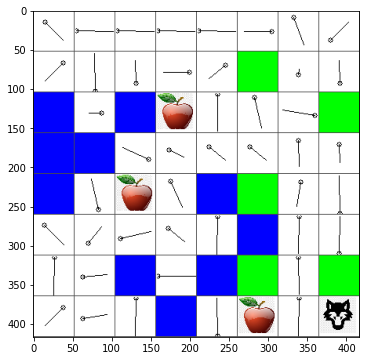

In [43]:
m.plot(Q)

## Kiểm tra Chính sách

Vì Q-Table liệt kê "mức độ hấp dẫn" của mỗi hành động tại mỗi trạng thái, nên rất dễ sử dụng nó để xác định cách điều hướng hiệu quả trong thế giới của chúng ta. Trong trường hợp đơn giản nhất, chúng ta chỉ cần chọn hành động tương ứng với giá trị cao nhất trong Q-Table:


In [13]:
# code block 9

2

Nếu bạn thử đoạn mã trên nhiều lần, bạn có thể nhận thấy rằng đôi khi nó chỉ "đứng yên", và bạn cần nhấn nút DỪNG trong notebook để ngắt nó.

> **Nhiệm vụ 1:** Sửa đổi hàm `walk` để giới hạn độ dài tối đa của đường đi bằng một số bước nhất định (ví dụ, 100), và quan sát đoạn mã trên trả về giá trị này theo thời gian.

> **Nhiệm vụ 2:** Sửa đổi hàm `walk` để nó không quay lại những nơi mà nó đã từng đi qua trước đó. Điều này sẽ ngăn `walk` lặp lại, tuy nhiên, tác nhân vẫn có thể bị "mắc kẹt" ở một vị trí mà nó không thể thoát ra được.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


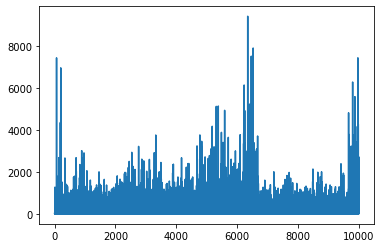

In [57]:
plt.plot(lpath)

## Bài tập
## Một thế giới Peter và Sói thực tế hơn



---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc sự không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn tham khảo chính thức. Đối với các thông tin quan trọng, nên sử dụng dịch vụ dịch thuật chuyên nghiệp từ con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
